# Step 1: Load and Understand the Dataset

## Objective
The goal of this step is to load the dataset and understand its basic structure before performing any analysis or visualisation.

---

## Dataset Description
This dataset contains metadata about movies and TV shows available on Netflix.  
Each row represents one Netflix title, and each column represents a specific attribute of that title.

---

## Loading the Dataset
We begin by importing the required library and loading the dataset into a pandas DataFrame.



In [12]:
import pandas as pd

df = pd.read_csv("netflix_titles.csv")


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.shape

(8807, 12)

In [18]:
df.columns


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Step 2: Examine Data Structure and Missing Values

## Objective
The purpose of this step is to understand the dataset’s structure, data types, and identify missing values before any cleaning or analysis.




In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [20]:
df.isnull().sum().sort_values(ascending=False)


director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

# Step 3: Check for Duplicate Records and Basic Data Consistency

## Objective
The goal of this step is to ensure that the dataset does not contain duplicate records and that key identifier columns are consistent. This helps maintain data reliability before analysis.



We first check whether any rows in the dataset are duplicated.

In [23]:
df.duplicated().sum()

np.int64(0)

Consistency Checks

In [22]:
df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

Release Year Range Check

In [24]:
df['release_year'].describe()


count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

# Step 4: Column-wise Understanding and Feature Categorization

## Objective
The goal of this step is to understand the role of each column and categorize features based on how they can be used in analysis. This helps determine what kind of questions the dataset can answer.

---

## Column Categorization

### Identifier Column
- **show_id**
  - Unique identifier for each Netflix title
  - Used only for identification
  - Not used in analysis or visualization

---

### Categorical Columns
These columns represent categories and are useful for grouping and comparison.

- **type** – Movie or TV Show  
- **rating** – Content maturity rating (e.g., TV-MA, PG-13)  
- **country** – Country of production  
- **listed_in** – Genre categories  

These columns are ideal for:
- Frequency analysis
- Distribution charts
- Group-based comparisons

---

### Text Columns
These columns contain free-text information and are not directly numeric.

- **title**
- **director**
- **cast**
- **description**

These columns are mainly used for:
- Descriptive context
- Optional text-based exploration
- Not suitable for numerical aggregation without transformation

---

### Date Column
- **date_added**
  - Represents when the title was added to Netflix
  - Stored as text and requires conversion to datetime for time-based analysis

This column enables:
- Trend analysis
- Year-wise content addition

---

### Numeric Column
- **release_year**
  - Represents the original release year of the title
  - Can be used for temporal analysis and comparisons

---

### Mixed-Type Column
- **duration**
  - Contains numeric values and text (e.g., "90 min", "2 Seasons")
  - Requires separation into numeric value and unit for proper analysis

---

## Summary of Feature Roles

| Feature Type | Columns |
|-------------|--------|
| Identifier | show_id |
| Categorical | type, rating, country, listed_in |
| Text | title, director, cast, description |
| Date | date_added |
| Numeric | release_year |
| Mixed | duration |

---

## Key Takeaways
- Most columns are categorical or text-based.
- Some columns require light preprocessing before analysis.
- No target variable is present, confirming that this is not a prediction-focused dataset.

---




# Step 5: Univariate Analysis (One Variable at a Time)

## Objective
The purpose of this step is to analyze individual columns independently to understand their distribution and dominant patterns. This helps build intuition before exploring relationships between variables.

---




## Analysis of Content Type
We begin by examining the distribution of Movies and TV Shows.


In [28]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Analysis of Content Ratings

In [29]:
df['rating'].value_counts()


rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

Analysis of Release Year

In [30]:
df['release_year'].value_counts().sort_index()


release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1032
2018    1147
2019    1030
2020     953
2021     592
Name: count, Length: 74, dtype: int64

Analysis of Country of Production

In [31]:
df['country'].value_counts().head(10)


country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

Analysis of Genres

In [36]:
df['listed_in'].str.split(', ').explode().value_counts().head(10)


listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64

# Step 6: Data Type Conversion and Feature Preparation

## Objective
The purpose of this step is to prepare specific columns for analysis and visualization by converting data types and creating derived features. Only minimal and necessary preprocessing is performed.

---

Converting `date_added` to Datetime
The `date_added` column is currently stored as text.  
To enable time-based analysis, it is converted to a datetime format.

In [37]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

Creating Year Added Feature

In [38]:
df['year_added'] = df['date_added'].dt.year


Preparing the Duration Column

In [39]:
df[['duration_value', 'duration_type']] = df['duration'].str.split(' ', expand=True)
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')


Handling Missing Values for Visualization

In [40]:
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')


Verification of Changes

In [41]:
df[['date_added', 'year_added', 'duration_value', 'duration_type']].head()


,date_added,year_added,duration_value,duration_type
0,2021-09-25,2021.0,90.0,min
1,2021-09-24,2021.0,2.0,Seasons
2,2021-09-24,2021.0,1.0,Season
3,2021-09-24,2021.0,1.0,Season
4,2021-09-24,2021.0,2.0,Seasons


# Step 7: Bivariate Analysis (Relationships Between Variables)

 Objective
The purpose of this step is to analyze relationships between two variables to uncover patterns and comparisons across categories and time.

---

 Movies vs TV Shows Over Time
We analyze how the number of Movies and TV Shows added to Netflix has changed over time.




<Axes: xlabel='year_added'>

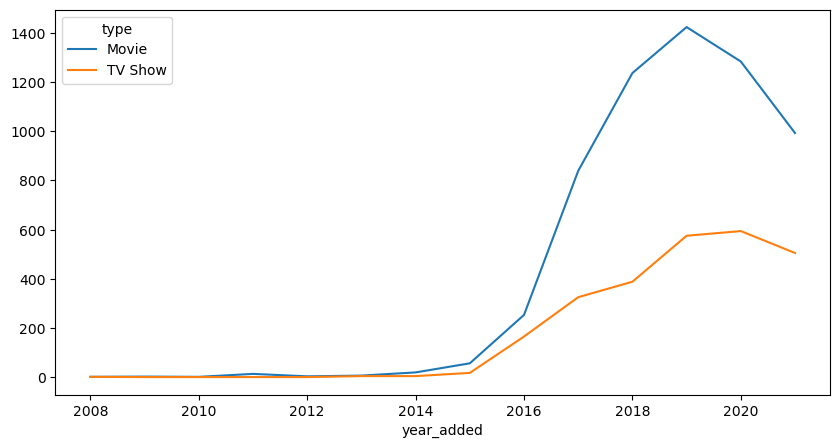

In [42]:

pd.crosstab(df['year_added'], df['type']).plot(figsize=(10,5))

Content Type by Country

In [43]:
pd.crosstab(df['country'], df['type']).sort_values(by='Movie', ascending=False).head(10)


type,Movie,TV Show
country,,
United States,2058,760
India,893,79
Unknown,440,391
United Kingdom,206,213
Canada,122,59
Spain,97,48
Egypt,92,14
Nigeria,86,9
Indonesia,77,2


Rating Distribution by Content Type

In [44]:
pd.crosstab(df['rating'], df['type'])


type,Movie,TV Show
rating,,
66 min,1,0
74 min,1,0
84 min,1,0
G,41,0
NC-17,3,0
NR,75,5
PG,287,0
PG-13,490,0
R,797,2


Genre Distribution by Content Type

In [46]:
df_genre = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
pd.crosstab(df_genre['genre'], df_genre['type']).head(10)


type,Movie,TV Show
genre,,
Action & Adventure,859,0
Anime Features,71,0
Anime Series,0,176
British TV Shows,0,253
Children & Family Movies,641,0
Classic & Cult TV,0,28
Classic Movies,116,0
Comedies,1674,0
Crime TV Shows,0,470


# Step 8: Visualization Refinement and Dashboard-Ready Charts

## Objective
The goal of this step is to create clean, simple, and interpretable visualizations that clearly communicate insights and can later be replicated in dashboards (Power BI / Tableau / Excel).

---

## Content Type Distribution
We visualize the overall distribution of Movies and TV Shows.



<Axes: title={'center': 'Distribution of Movies and TV Shows'}, xlabel='Content Type', ylabel='Number of Titles'>

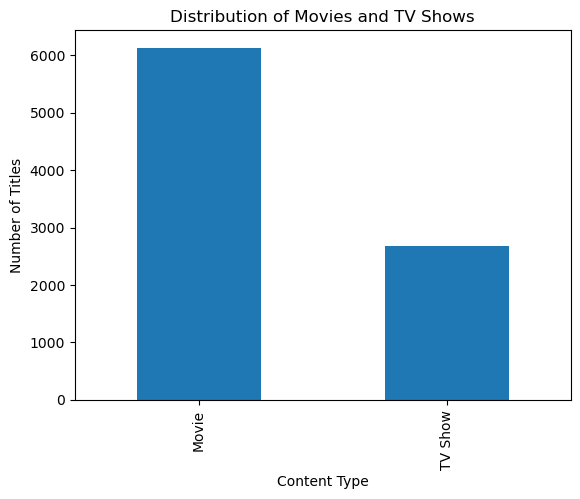

In [47]:


df['type'].value_counts().plot(
    kind='bar',
    title='Distribution of Movies and TV Shows',
    xlabel='Content Type',
    ylabel='Number of Titles'
)

Content Added Over Time

<Axes: title={'center': 'Content Added to Netflix Over Time'}, xlabel='Year', ylabel='Number of Titles'>

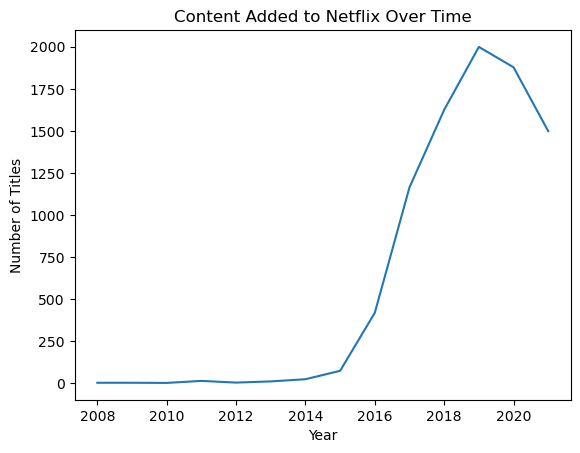

In [48]:
df['year_added'].value_counts().sort_index().plot(
    kind='line',
    title='Content Added to Netflix Over Time',
    xlabel='Year',
    ylabel='Number of Titles'
)


Top Content-Producing Countries

<Axes: title={'center': 'Top 10 Content-Producing Countries on Netflix'}, xlabel='Country', ylabel='Number of Titles'>

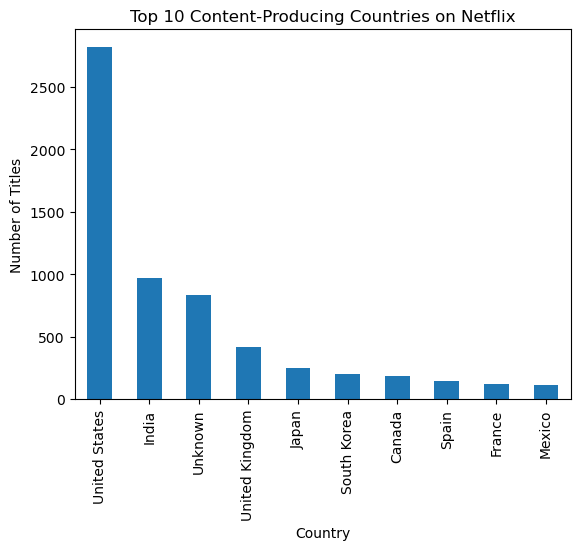

In [49]:
df['country'].value_counts().head(10).plot(
    kind='bar',
    title='Top 10 Content-Producing Countries on Netflix',
    xlabel='Country',
    ylabel='Number of Titles'
)


Rating Distribution

<Axes: title={'center': 'Distribution of Content Ratings'}, xlabel='Rating', ylabel='Number of Titles'>

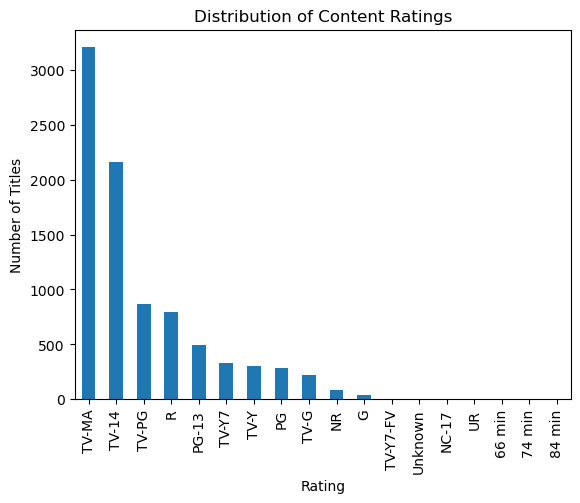

In [50]:
df['rating'].value_counts().plot(
    kind='bar',
    title='Distribution of Content Ratings',
    xlabel='Rating',
    ylabel='Number of Titles'
)


Genre Distribution

<Axes: title={'center': 'Top 10 Genres on Netflix'}, xlabel='Genre', ylabel='Number of Titles'>

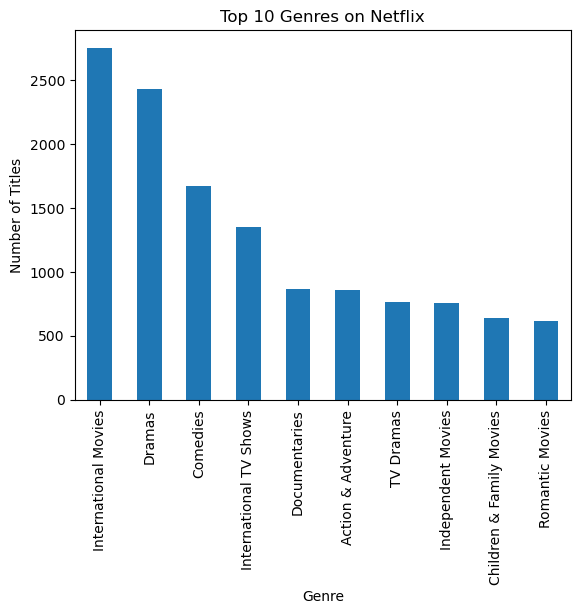

In [52]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(
    kind='bar',
    title='Top 10 Genres on Netflix',
    xlabel='Genre',
    ylabel='Number of Titles'
)


In [54]:
movies = df[df['type'] == 'Movie']

avg_movie_duration = (
    movies.groupby('release_year')
    .agg(avg_duration_minutes = ('duration_value', lambda x: x.mean()))
    .reset_index()
)

avg_movie_duration.tail(10)


,release_year,avg_duration_minutes
63,2012,100.757225
64,2013,98.048889
65,2014,100.261364
66,2015,99.513854
67,2016,95.360182
68,2017,95.535248
69,2018,96.185137
70,2019,93.466035
71,2020,92.141199
72,2021,96.444043


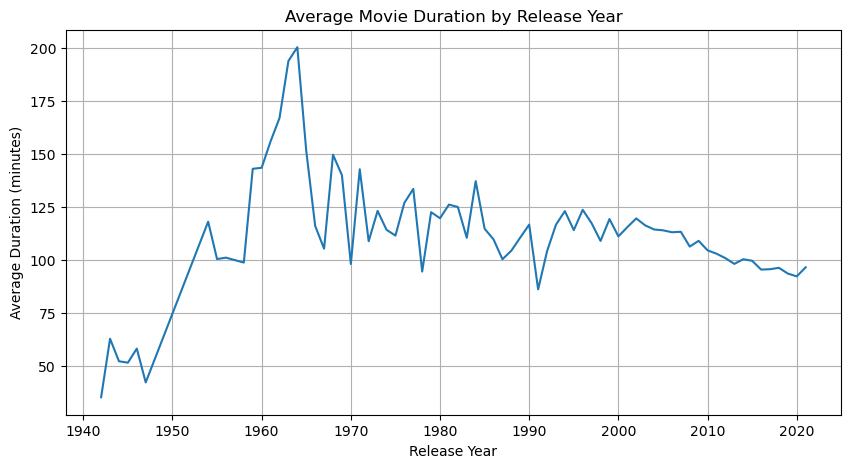

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    avg_movie_duration['release_year'],
    avg_movie_duration['avg_duration_minutes']
)
plt.title('Average Movie Duration by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.show()


### Insight
The average duration of Netflix movies remains relatively stable across release years, generally clustering around the 90–120 minute range. This suggests Netflix maintains a consistent movie length strategy rather than significantly increasing or decreasing runtimes over time.


In [57]:
df.to_csv("netflix_dashboard_ready.csv", index=False)
